In [29]:
# Descriptive Analytics on file 'Plant Experiment.xlsx' 
# Work on Variable: Weight
# Load necessary packages
import pandas as pd
# Load dataset to variable df
df = pd.read_excel('PlantExperiment.xlsx')

In [32]:
# Exploratory Data Analysis
# Conduct Normality testing
# Null Hypothesis: The distribution is approximately normal
print("Shane Ivan Fallar")
import scipy.stats as stats
Wtx = df[(df['Group'] == 'Treatment')].Weight
Wcon = df[(df['Group'] == 'Control')].Weight
stats.anderson(Wtx, dist='norm')
stats.anderson(Wcon, dist='norm')

Shane Ivan Fallar


AndersonResult(statistic=0.24756808048311285, critical_values=array([0.519, 0.591, 0.709, 0.827, 0.984]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

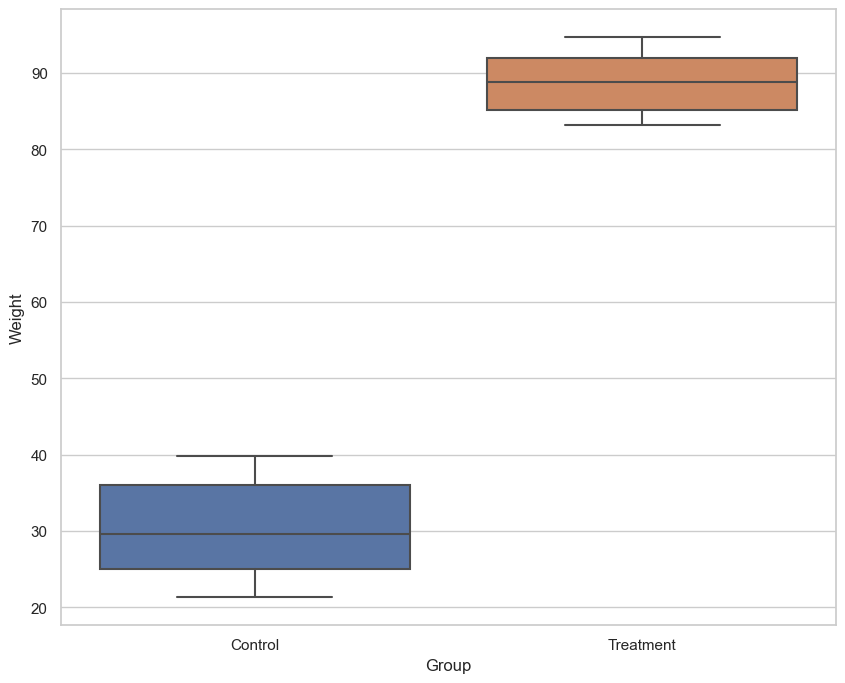

In [71]:
# Data Visualization - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Group', y='Weight', data=df, orient="v")

C:\Users\Shane Ivan Fallar\AppData\Local\Temp\ipykernel_2932\4169783574.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bx = sns.distplot(df[df["Group"]== "Control"].Weight)
C:\Users\Shane Ivan Fallar\AppData\Local\Temp\ipykernel_2932\4169783574.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  cx = sns.distplot(df

Shane Ivan Fallar


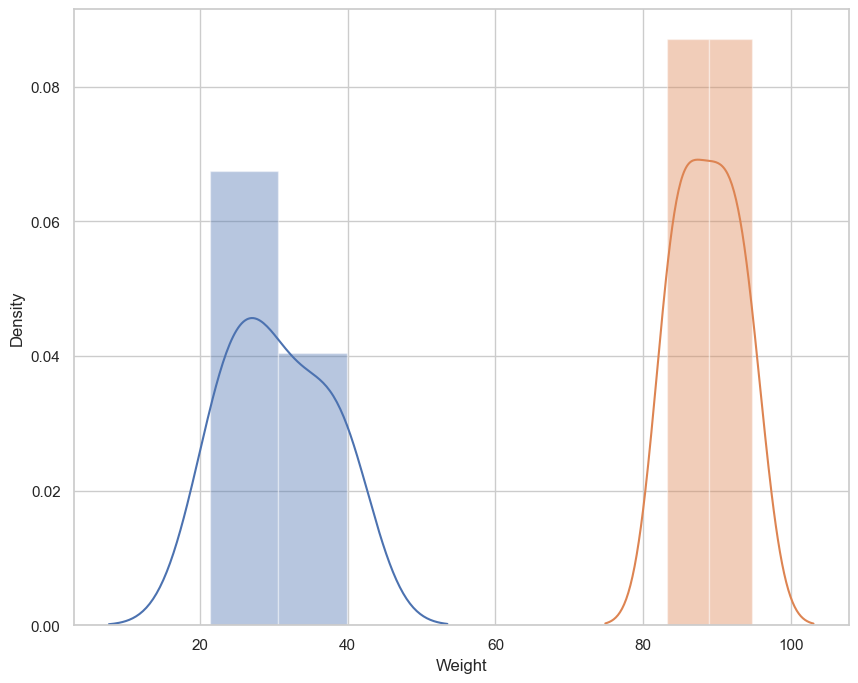

In [36]:
# Data Visualization - Distribution plot
sns.set(style = "whitegrid")
plt.figure(figsize=(10,8))
bx = sns.distplot(df[df["Group"]== "Control"].Weight)
cx = sns.distplot(df[df["Group"]== "Treatment"].Weight)
print("Shane Ivan Fallar")


In [42]:
#Descriptive Analysis
print("Shane Ivan Fallar")
Desc = df['Weight'].groupby(df['Group']).describe()
Desc.to_csv("DescRes1.csv")

Shane Ivan Fallar


In [44]:
#Inferential Analysis
# Condition: Distributions Approximately Normal | Variance is Homogenous
print("Shane Ivan Fallar")
import researchpy as rp
rp.ttest(Wtx, Wcon, equal_variances= True, paired= False)

Shane Ivan Fallar


c:\Users\Shane Ivan Fallar\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable     N     Mean         SD        SE  95% Conf.   Interval
 0    Weight   8.0  88.7550   4.217088  1.490966  85.229426  92.280574
 1    Weight   8.0  30.4800   6.888365  2.435405  24.721183  36.238817
 2  combined  16.0  59.6175  30.594701  7.648675  43.314734  75.920266,
                 Independent t-test  results
 0  Difference (Weight - Weight) =   58.2750
 1            Degrees of freedom =   14.0000
 2                             t =   20.4076
 3         Two side test p value =    0.0000
 4        Difference < 0 p value =    1.0000
 5        Difference > 0 p value =    0.0000
 6                     Cohen's d =   10.2038
 7                     Hedge's g =    9.6472
 8                Glass's delta1 =   13.8188
 9              Point-Biserial r =    0.9836)

## ACTIVITY 6

In [45]:
# Descriptive Analytics on file 'SleepData.xlsx'
# Work on Variable Sleep per Employment
# Load necessary packages
import pandas as pd

In [46]:
# Load dataset to variable df
df = pd.read_excel('SleepData.xlsx')

In [48]:
# Check for missing cases
print("Shane Ivan Fallar")
df.isnull().values.any()

Shane Ivan Fallar


False

In [50]:
# Check structure of dataframe
print("Shane Ivan Fallar")
df.info()

Shane Ivan Fallar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    671 non-null    object 
 1   Age                    671 non-null    int64  
 2   MaritalStatus          671 non-null    object 
 3   Employment             671 non-null    object 
 4   sleep(hrs)/weeknights  671 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 26.3+ KB


In [53]:
# Exploratory Data Analysis
#Conduct Normality testing
# Null Hypothesis: The distribution is approximately normal
print("Shane Ivan Fallar")
import scipy.stats as stats
df = df.rename(columns= {"sleep(hrs)/weeknights":"Sleep"})
SlpPerm = df[(df['Employment'] == 'Permanent')].Sleep
SlpProb = df[(df['Employment'] == 'Probationary')].Sleep
stats.anderson(SlpPerm, dist='norm')
stats.anderson(SlpProb, dist='norm')

Shane Ivan Fallar


AndersonResult(statistic=0.36262665229844515, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.079]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [70]:
# Data Visualization - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

Shane Ivan Fallar


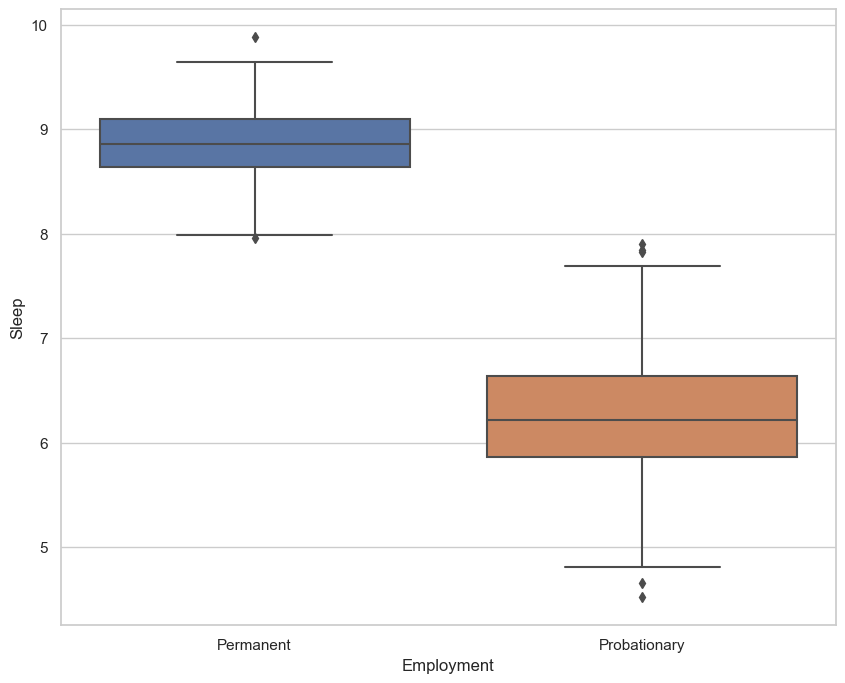

In [56]:
# %matplotlib inline
print("Shane Ivan Fallar")
sns.set(style = "whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'Employment', 
                 y = 'Sleep', 
                 data=df, 
                 orient="v")

C:\Users\Shane Ivan Fallar\AppData\Local\Temp\ipykernel_2932\2022420923.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bx = sns.distplot(SlpPerm)
C:\Users\Shane Ivan Fallar\AppData\Local\Temp\ipykernel_2932\2022420923.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  cx = sns.distplot(SlpProb)


Shane Ivan Fallar


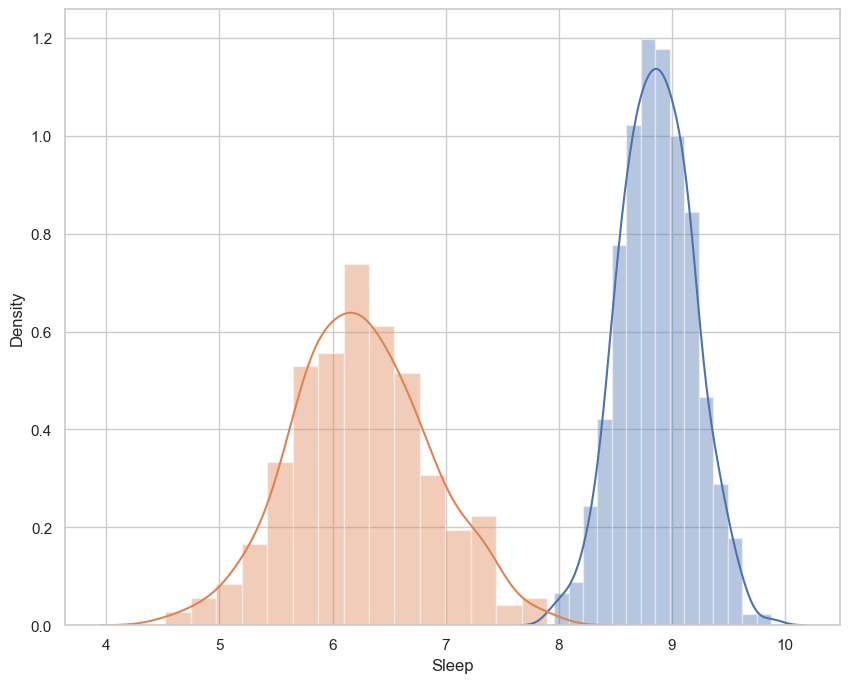

In [58]:
# Data Visualization - Distribution plot
sns.set(style = "whitegrid")
plt.figure(figsize=(10,8))
bx = sns.distplot(SlpPerm)
cx = sns.distplot(SlpProb)
print("Shane Ivan Fallar")

Shane Ivan Fallar


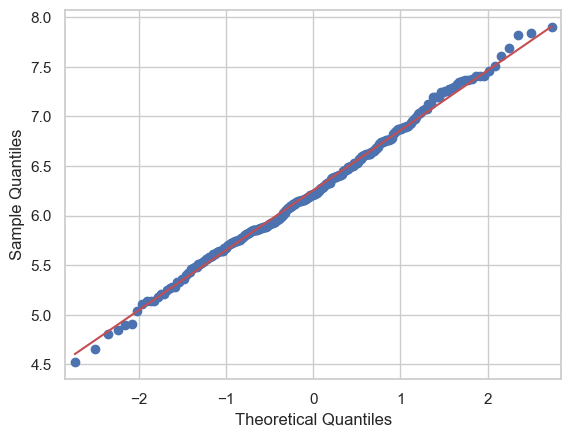

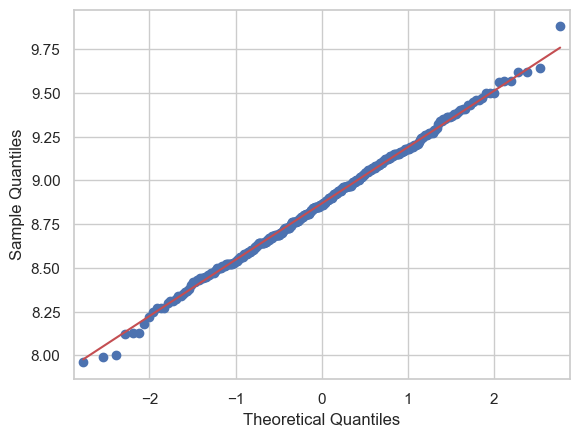

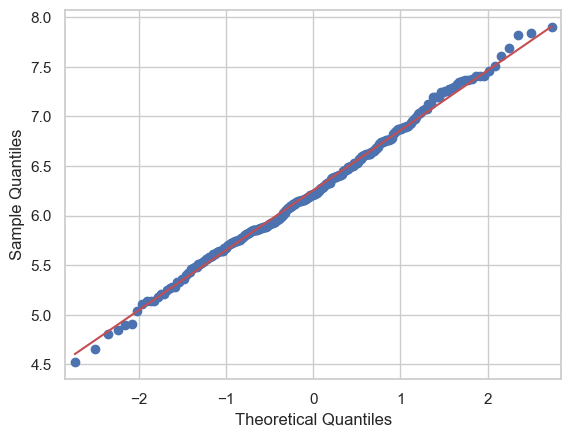

In [59]:
# Data Visualization - Quartile - Quartile Plots
print("Shane Ivan Fallar")
import statsmodels.api as sm
sm.qqplot(SlpPerm, line="s")
sm.qqplot(SlpProb, line="s")

In [60]:
# Conduct Test for Homogeneity
print("Shane Ivan Fallar")
stats.levene(SlpPerm, SlpProb, center='mean')

Shane Ivan Fallar


LeveneResult(statistic=99.83475924227729, pvalue=5.2723080292328315e-22)

In [61]:
#Descriptive Analysis
print("Shane Ivan Fallar")
Desc = df['Sleep'].groupby(df['Employment']).describe()
Desc.to_csv("DescRes.csv")

Shane Ivan Fallar


In [63]:
#Inferential Analysis
# Condition: Distributions Approximately Normal | Variance is not Homogenous
import researchpy as rp
print("Shane Ivan Fallar")
rp.ttest(SlpProb, SlpPerm, equal_variances= False, paired= False)

Shane Ivan Fallar


c:\Users\Shane Ivan Fallar\AppData\Local\Programs\Python\Python311\Lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Sleep  319.0  6.255078  0.604951  0.033871   6.188439  6.321717
 1     Sleep  352.0  8.868438  0.322398  0.017184   8.834641  8.902234
 2  combined  671.0  7.626021  1.390674  0.053686   7.520607  7.731435,
             Satterthwaite t-test   results
 0  Difference (Sleep - Sleep) =    -2.6134
 1          Degrees of freedom =   474.2993
 2                           t =   -68.8080
 3       Two side test p value =     0.0000
 4      Difference < 0 p value =     0.0000
 5      Difference > 0 p value =     1.0000
 6                   Cohen's d =    -5.4672
 7                   Hedge's g =    -5.4611
 8              Glass's delta1 =    -4.3200
 9            Point-Biserial r =    -0.9534)

## ACTIVITY 7

In [64]:
# Load necessary packages
import pandas as pd

In [65]:
# Load dataset to variable df
df = pd.read_excel('PlantExperiment.xlsx')

In [66]:
# Check for missing cases
print("Shane Ivan Fallar")
df.isnull().values.any()

Shane Ivan Fallar


False

In [67]:
# Check structure of dataframe
print("Shane Ivan Fallar")
df.info()

Shane Ivan Fallar
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     int64  
 1   Group       16 non-null     object 
 2   Weight      16 non-null     float64
 3   Length      16 non-null     float64
 4   Stalk       16 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 768.0+ bytes


In [68]:
# Exploratory Data Analysis
# Conduct Normality testing
# Null Hypothesis: The distribution is approximately normal
print("Shane Ivan Fallar")
import scipy.stats as stats
Wtx = df[(df['Group'] == 'Treatment')].Length
Wcon = df[(df['Group'] == 'Control')].Length
stats.anderson(Wtx, dist='norm')
stats.anderson(Wcon, dist='norm')

Shane Ivan Fallar


AndersonResult(statistic=0.14108651046624843, critical_values=array([0.519, 0.591, 0.709, 0.827, 0.984]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Shane Ivan Fallar


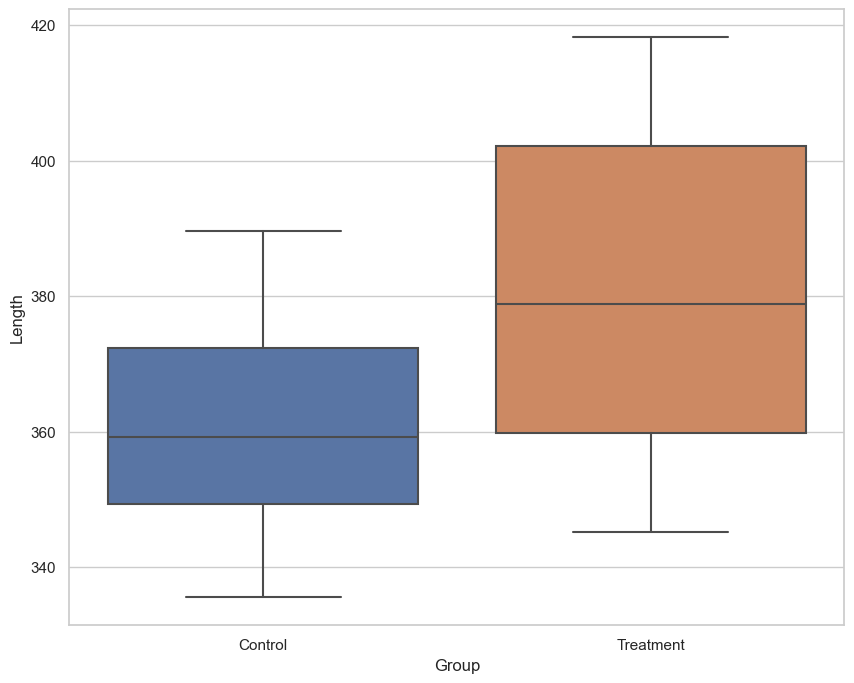

In [73]:
# Data Visualization - Boxplot
print("Shane Ivan Fallar")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Group', y='Length', data=df, orient="v")

C:\Users\Shane Ivan Fallar\AppData\Local\Temp\ipykernel_2932\862180270.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  bx = sns.distplot(df[df["Group"]== "Control"].Length)
C:\Users\Shane Ivan Fallar\AppData\Local\Temp\ipykernel_2932\862180270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  cx = sns.distplot(df[d

Shane Ivan Fallar


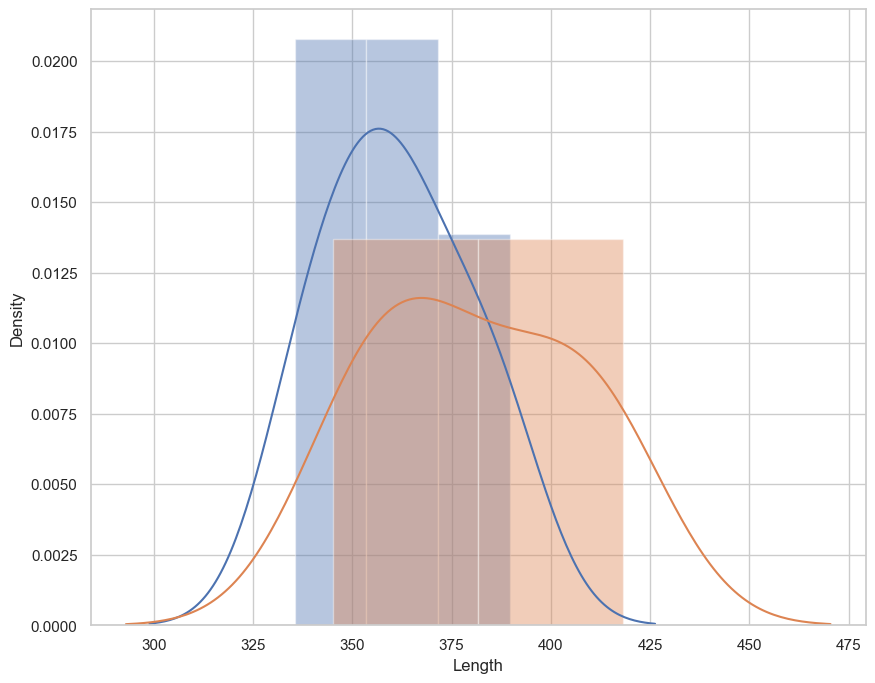

In [79]:
# Data Visualization - Distribution plot
sns.set(style = "whitegrid")
plt.figure(figsize=(10,8))
bx = sns.distplot(df[df["Group"]== "Control"].Length)
cx = sns.distplot(df[df["Group"]== "Treatment"].Length)
print("Shane Ivan Fallar")

In [80]:
# Conduct Test for Homogeneity
# Null Hypothesis: The variances are Homogenous
print("Shane Ivan Fallar")
stats.levene(SlpPerm, SlpProb, center='mean')

Shane Ivan Fallar


LeveneResult(statistic=99.83475924227729, pvalue=5.2723080292328315e-22)

In [83]:
#Descriptive Analysis
print("Shane Ivan Fallar")
Desc = df['Length'].groupby(df['Group']).describe()
Desc.to_csv("DescRes3.csv")

Shane Ivan Fallar
